### 1. Data extraction 

In [1]:
import pandas as pd

In [11]:
tweets_filtered_df = pd.read_csv("./filtered_tweets.csv",encoding='utf-8')
tweets_filtered_df

,Unnamed: 0,author_id_y,text_x,cleaned_tweets
0,119,AppleSupport,Hey @AppleSupport and anyone else who upgraded...,upgrad capit mail put
1,120,AppleSupport,Tf is wrong with my keyboard @115858,wrong keyboard
2,121,AppleSupport,@115858 @AppleSupport hello are all the lines ...,line close tonight
3,122,AppleSupport,"Hello, internet. Can someone explain why this ...",internet explain symbol keep appear phone type...
4,123,AppleSupport,@AppleSupport I’ve got a screenshot saying my ...,screenshot say iphonex reserv email say happen
...,...,...,...,...
74636,875110,AppleSupport,anyone having issues with #osx #HighSierra and...,highsierra slack zoom multipl monitor get majo...
74637,875147,AppleSupport,Hey @AppleSupport - not being able to duplicat...,abl duplic file page search annoy
74638,875148,AppleSupport,Yo @AppleSupport is that weird glitch w/ the c...,weird glitch capit attempt tweet
74639,875171,AppleSupport,What the fuck @AppleSupport my phone keeps ha...,phone keep hang call show failur


### 2. Exploratory Data Analysis 

In [12]:
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import contractions
import gensim

nltk.download("words")
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')

[nltk_data] Downloading package words to /Users/jkannan/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jkannan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:

common_words = ['hello', 'hey', 'apple','hi', 'fuck', 'shit', 'help','issu', 'problem']

stemmer = PorterStemmer()
lemmer = WordNetLemmatizer()

def tweet_pre_process(tweet, filter_words): 
    '''
    Method to pre process document line including case change, removal of non-alphabetic 
    characters, smaller words, stop words and then stemming it. 

    Input   : tweet text as String 
    Returns : pre-processed line as String 
    '''
    print(tweet)
    tweet = tweet.lower() # convert to lower case
    tweet = re.sub("@\w*"," ", tweet) # remove mentions 
    tweet = re.sub('https?://(?:www\.)?[a-zA-Z0-9./]+', '', tweet) # remove URLs
    tweet = contractions.fix(tweet) # expand colloquial use abbreviations 
    tweet = re.sub("[!'’\"$%&()*+-/:;<=>?@[\]^_`{|}~\n -' ]", " ", tweet) # remove punctuation 
    tweet = tweet.replace('“', '').replace('”', '').replace('"', '') # remove fancy quotes 
    tweet = re.sub('[0-9]+\w*','', tweet) # remove numbers
    emojis = re.compile("[" # remove emoticons & symbols
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags = re.UNICODE)
    tweet = emojis.sub(r' ', tweet)
    tweet = re.sub('(?<![\w\-])\w(?![\w\-])','',tweet) # remove single letter words 
    tokens = tweet.split()
    tokens = [i for i in tokens if not i in stop_words and not i in filter_words] # remove stop words 
    cleaned = " ".join(tokens)
    result = []
    for token in gensim.utils.simple_preprocess(cleaned) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            converted = stemmer.stem(lemmer.lemmatize(token,pos='v'))
            if converted not in filter_words:
                result.append(converted)
    return " ".join(result)


tweets_filtered_df['cleaned_tweets'] = tweets_filtered_df['text_x'].apply(tweet_pre_process, args=(common_words,))
tweets_filtered_df

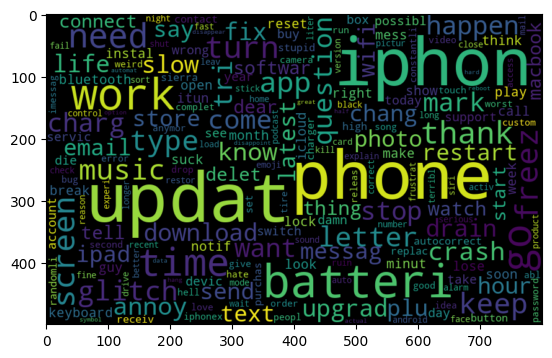

In [ ]:
# inspect word cloud
wordcloud = WordCloud(width=800, height=500, random_state=2023, max_font_size=110, collocations=False).generate(".".join(tweets_filtered_df['cleaned_tweets'].to_list()))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()


We can see good representation of clean usable data with a fix of technical words (ios, update, fix), multiple aspects (battery, music, call), sentiment words (thank, question mark) which we can use for further data representation and Topic modelling. 

## 3. Guided Multi Class LDA 

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from importlib import reload  # Python 3.4+
import gmc_lda

reload(gmc_lda)
from gmc_lda import GMC_LDA

[nltk_data] Downloading package punkt to /Users/jkannan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jkannan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/Users/jkannan/Library/CloudStorage/WorkDocsDrive-Documents/Learning/Imperial MLDS/Term 6/project/gmc_lda.py:52: DeprecationWarning: invalid escape sequence \w
  tweet = tweet.replace('“', '').replace('”', '').replace('"', '') # remove fancy quotes
/Users/jkannan/Library/CloudStorage/WorkDocsDrive-Documents/Learning/Imperial MLDS/Term 6/project/gmc_lda.py:53: DeprecationWarning: invalid escape sequence \.
  tweet = re.sub('[0-9]+\w*','', tweet) # remove numbers
/Users/jkannan/Library/CloudStorage/WorkDocsDrive-Documents/Learning/Imperial MLDS/Term 6/project/gmc_lda.py:54: DeprecationWarning: invalid escape sequence \]
  emojis = re.compile("[" # remove emoticons & symbols
/U

### A. Guided Word Identification

In [ ]:
def filter_and_get_nouns(df, col, filter_words): 
    df['cleaned_tweets_for_gmc_lda'] = df[col].apply(tweet_pre_process, args=(filter_words,))
    df['nouns only'] = df['cleaned_tweets_for_gmc_lda'].apply(lambda tweet:[w for w,t in nltk.pos_tag(nltk.word_tokenize(tweet)) if t=='NN'])
    nouns = df["nouns only"].explode().value_counts()
    df.drop(['cleaned_tweets_for_gmc_lda', 'nouns only'], axis=1, inplace=True)
    return nouns

In [ ]:
noise_words = ['hello', 'hey', 'apple','hi', 'fuck', 'shit', 'help','issu', 'problem', 'work','batteri','time', 'work' ,'thanks', 'letter', 'glitch', 'question', 'mark', 'turn', 'need','help','problem','issu', 'shit','fuck','hour','tri',
                  'chang','thing','annoy', 'fix', 'guy', 'stop', 'call', 'week', 'month', 'mess', 'break', 'minut', 'start', 'look', 'today', 'support', \
                      'year', 'day', 'suck', 'box', 'get', 'tell', 'thank', 'damn', 'send', ' replac', 'reset', 'order', 'complet', 'tire', 'die', 'contact', \
                        'idea', 'error', 'drop', 'hate', 'anymor', 'receiv', 'bug', 'randomli', 'hell', 'number', 'reason', 'possibl', 'sort', 'peopl', \
                           'constantli', 'purchas', 'hello', 'wait', 'frustrat', 'product', 'night', 'liter'] 
class_common_words = ['appl', 'battery', 'update', 'music', 'screen', 'apple', 'type', 'freez', 'crash', 'app','life','charg', 'download', 'drain', 'store', 'photo',
                'delet', 'updat', 'plu', 'messag', 'text', 'restart', 'email', 'wifi', 'lock', 'keyboard', 'play', 'show', 'itun', 'connect', 'account', \
                   'connect', 'button', 'switch', 'custom', 'charger', 'video', 'camera', 'song', 'password', 'home', 'control', 'softwar', 'restor', 'devic', \
                      'load', 'alarm', 'servic', 'access', 'version', 'card', 'mail', 'imessag', 'autocorrect' ]
probable_class_words = ['iphone', 'phone', 'watch', 'macbook', 'ipad', 'sierra', 'icloud', 'iphonex',  ]
common_words_for_gmc_lda = noise_words + class_common_words + probable_class_words
nouns_df = filter_and_get_nouns(tweets_filtered_df, 'text_x', common_words_for_gmc_lda)
nouns_df.head(30)

In [ ]:
gmc_model = GMC_LDA(df = tweets_filtered_df, raw_col = 'text_x')


[nltk_data] Downloading package words to /Users/jkannan/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jkannan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### B. Partitioning

In [ ]:
noise_words = ['hello', 'hey', 'apple','hi', 'fuck', 'shit', 'help','issu', 'problem', 'work','batteri','time', 'work' ,'thanks', 'letter', 'glitch', 'question', 'mark', 'turn', 'need','help','problem','issu', 'shit','fuck','hour','tri',
                  'chang','thing','annoy', 'fix', 'guy', 'stop', 'call', 'week', 'month', 'mess', 'break', 'minut', 'start', 'look', 'today', 'support', \
                      'year', 'day', 'suck', 'box', 'get', 'tell', 'thank', 'damn', 'send', ' replac', 'reset', 'order', 'complet', 'tire', 'die', 'contact', \
                        'idea', 'error', 'drop', 'hate', 'anymor', 'receiv', 'bug', 'randomli', 'hell', 'number', 'reason', 'possibl', 'sort', 'peopl', \
                           'constantli', 'purchas', 'hello', 'wait', 'frustrat', 'product', 'night', 'liter'] 
class_common_words = ['appl', 'battery', 'update', 'music', 'screen', 'apple', 'type', 'freez', 'crash', 'app','life','charg', 'download', 'drain', 'store', 'photo',
                'delet', 'updat', 'plu', 'messag', 'text', 'restart', 'email', 'wifi', 'lock', 'keyboard', 'play', 'show', 'itun', 'connect', 'account', \
                   'connect', 'button', 'switch', 'custom', 'charger', 'video', 'camera', 'song', 'password', 'home', 'control', 'softwar', 'restor', 'devic', \
                      'load', 'alarm', 'servic', 'access', 'version', 'card', 'mail', 'imessag', 'autocorrect' ]
class_words = [ ['iphone', 'phone', 'iphonex','youtube', 'mail','facebook','twitter'],
                ['ipad', 'tablet'],
                ['mac', 'macbook', 'sierra', 'macos', 'osx', 'keyboard'], 
                ['ipod', 'itunes', 'music','podcast'],
                ['watch', 'watchos', 'series'],
                ['icloud', 'drive', 'pages', 'numbers', 'keychain', 'photos', 'apple id'], 
                []]
class_names = ['iphone', 'ipad', 'mac','ipod', 'watch', 'icloud', 'others']

gmc_model.generate_class_dataframes(noise_words=noise_words,
                                    class_words=class_words,
                                    class_names=class_names)
gmc_model.print_partition_info()

/Users/jkannan/Library/CloudStorage/WorkDocsDrive-Documents/Learning/Imperial MLDS/Term 6/project/gmc_lda.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for class_words in self.class_words:


iphone (33873, 5)
ipad (1095, 5)
mac (3586, 5)
ipod (2457, 5)
watch (985, 5)
icloud (1409, 5)
others (31227, 5)


/Users/jkannan/Library/CloudStorage/WorkDocsDrive-Documents/Learning/Imperial MLDS/Term 6/project/gmc_lda.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def print_partition_info(self):


### C. Multi class LDA 

In [ ]:
gmc_model.get_best_model(topic_only=False)

In [ ]:
params = [
        [6, 'asymmetric', 0.91],
        [10,0.31, 0.01],
        [8,"asymmetric", 0.91], 
        [9, "asymmetric", 0.91],
        [9, 0.31, 0.01] ,
        [5, "asymmetric", 0.91], 
        [5, "asymmetric",  0.91]
    ]
gmc_model.get_best_LDA_models(params)

In [ ]:
id = 3
cor = gmc_model.class_corpus[id]
dic = gmc_model.class_dictionary[id]
lda_model = gmc_model.best_LDA_models[id]
pyLDAvis.enable_notebook()
p = gensimvis.prepare(lda_model, cor, dic)
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.202144  0.163501       1        1  30.322336
2      0.161717  0.092203       2        1  19.862688
1     -0.163615 -0.091373       3        1  17.020964
3      0.095850  0.088240       4        1  10.026069
4      0.052517 -0.042474       5        1   6.891767
6      0.016703 -0.076809       6        1   5.529519
5      0.013564 -0.049930       7        1   5.067658
8      0.022803 -0.042571       8        1   2.848239
7      0.002605 -0.040788       9        1   2.430760, topic_info=        Term        Freq       Total Category  logprob  loglift
9       itun  523.000000  523.000000  Default  30.0000  30.0000
5    podcast  336.000000  336.000000  Default  29.0000  29.0000
105     ipod   96.000000   96.000000  Default  28.0000  28.0000
15     updat  367.000000  367.000000  Default  27.0000  27.0000
23      play  278.000000  278.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
123   laptop    1.181084   16.455306   Topic9  -5.3895   1.0828
207     take    1.550193   37.630395   Topic9  -5.1176   0.5275
65      lose    1.367056   34.104390   Topic9  -5.2433   0.5002
53    access    1.521557   52.919752   Topic9  -5.1362   0.1679
18      come    1.093020   50.939788   Topic9  -5.4670  -0.1247

[384 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
111       1  0.450609    abl
111       2  0.253468    abl
111       3  0.140815    abl
111       4  0.056326    abl
111       5  0.028163    abl
...     ...       ...    ...
136       3  0.167856  wrong
136       4  0.033571  wrong
136       5  0.067142  wrong
136       6  0.033571  wrong
136       7  0.033571  wrong

[2153 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4, 5, 7, 6, 9, 8])